In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('House_Price.csv')

In [3]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


# Columns Renaming

In [4]:
df = df.rename(columns={"Distance from nearest Metro station (km)": "Distance from nearest Metro station in km", "House size (sqft)": "House size in sqft"})

# Extracting House Price

In [5]:
df["House Price"] = df["House size in sqft"]*df["House price of unit area"]

In [6]:
df.shape

(414, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Transaction date                           414 non-null    float64
 1   House Age                                  414 non-null    float64
 2   Distance from nearest Metro station in km  414 non-null    float64
 3   Number of convenience stores               414 non-null    int64  
 4   latitude                                   414 non-null    float64
 5   longitude                                  414 non-null    float64
 6   Number of bedrooms                         414 non-null    int64  
 7   House size in sqft                         414 non-null    int64  
 8   House price of unit area                   414 non-null    float64
 9   House Price                                414 non-null    float64
dtypes: float64(7), int64(3)
me

# Exploratory Data Analysis

<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

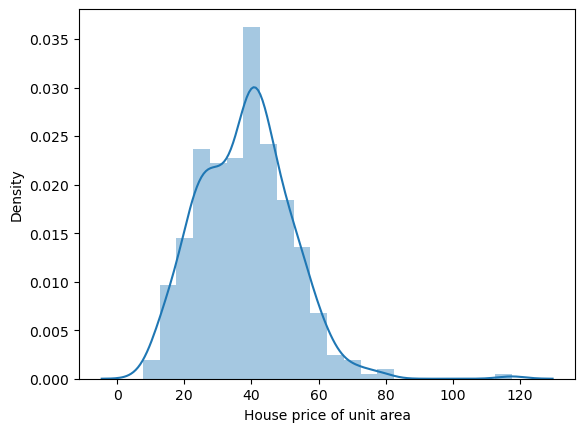

In [8]:
sns.distplot(df["House price of unit area"])

<Figure size 800x800 with 0 Axes>

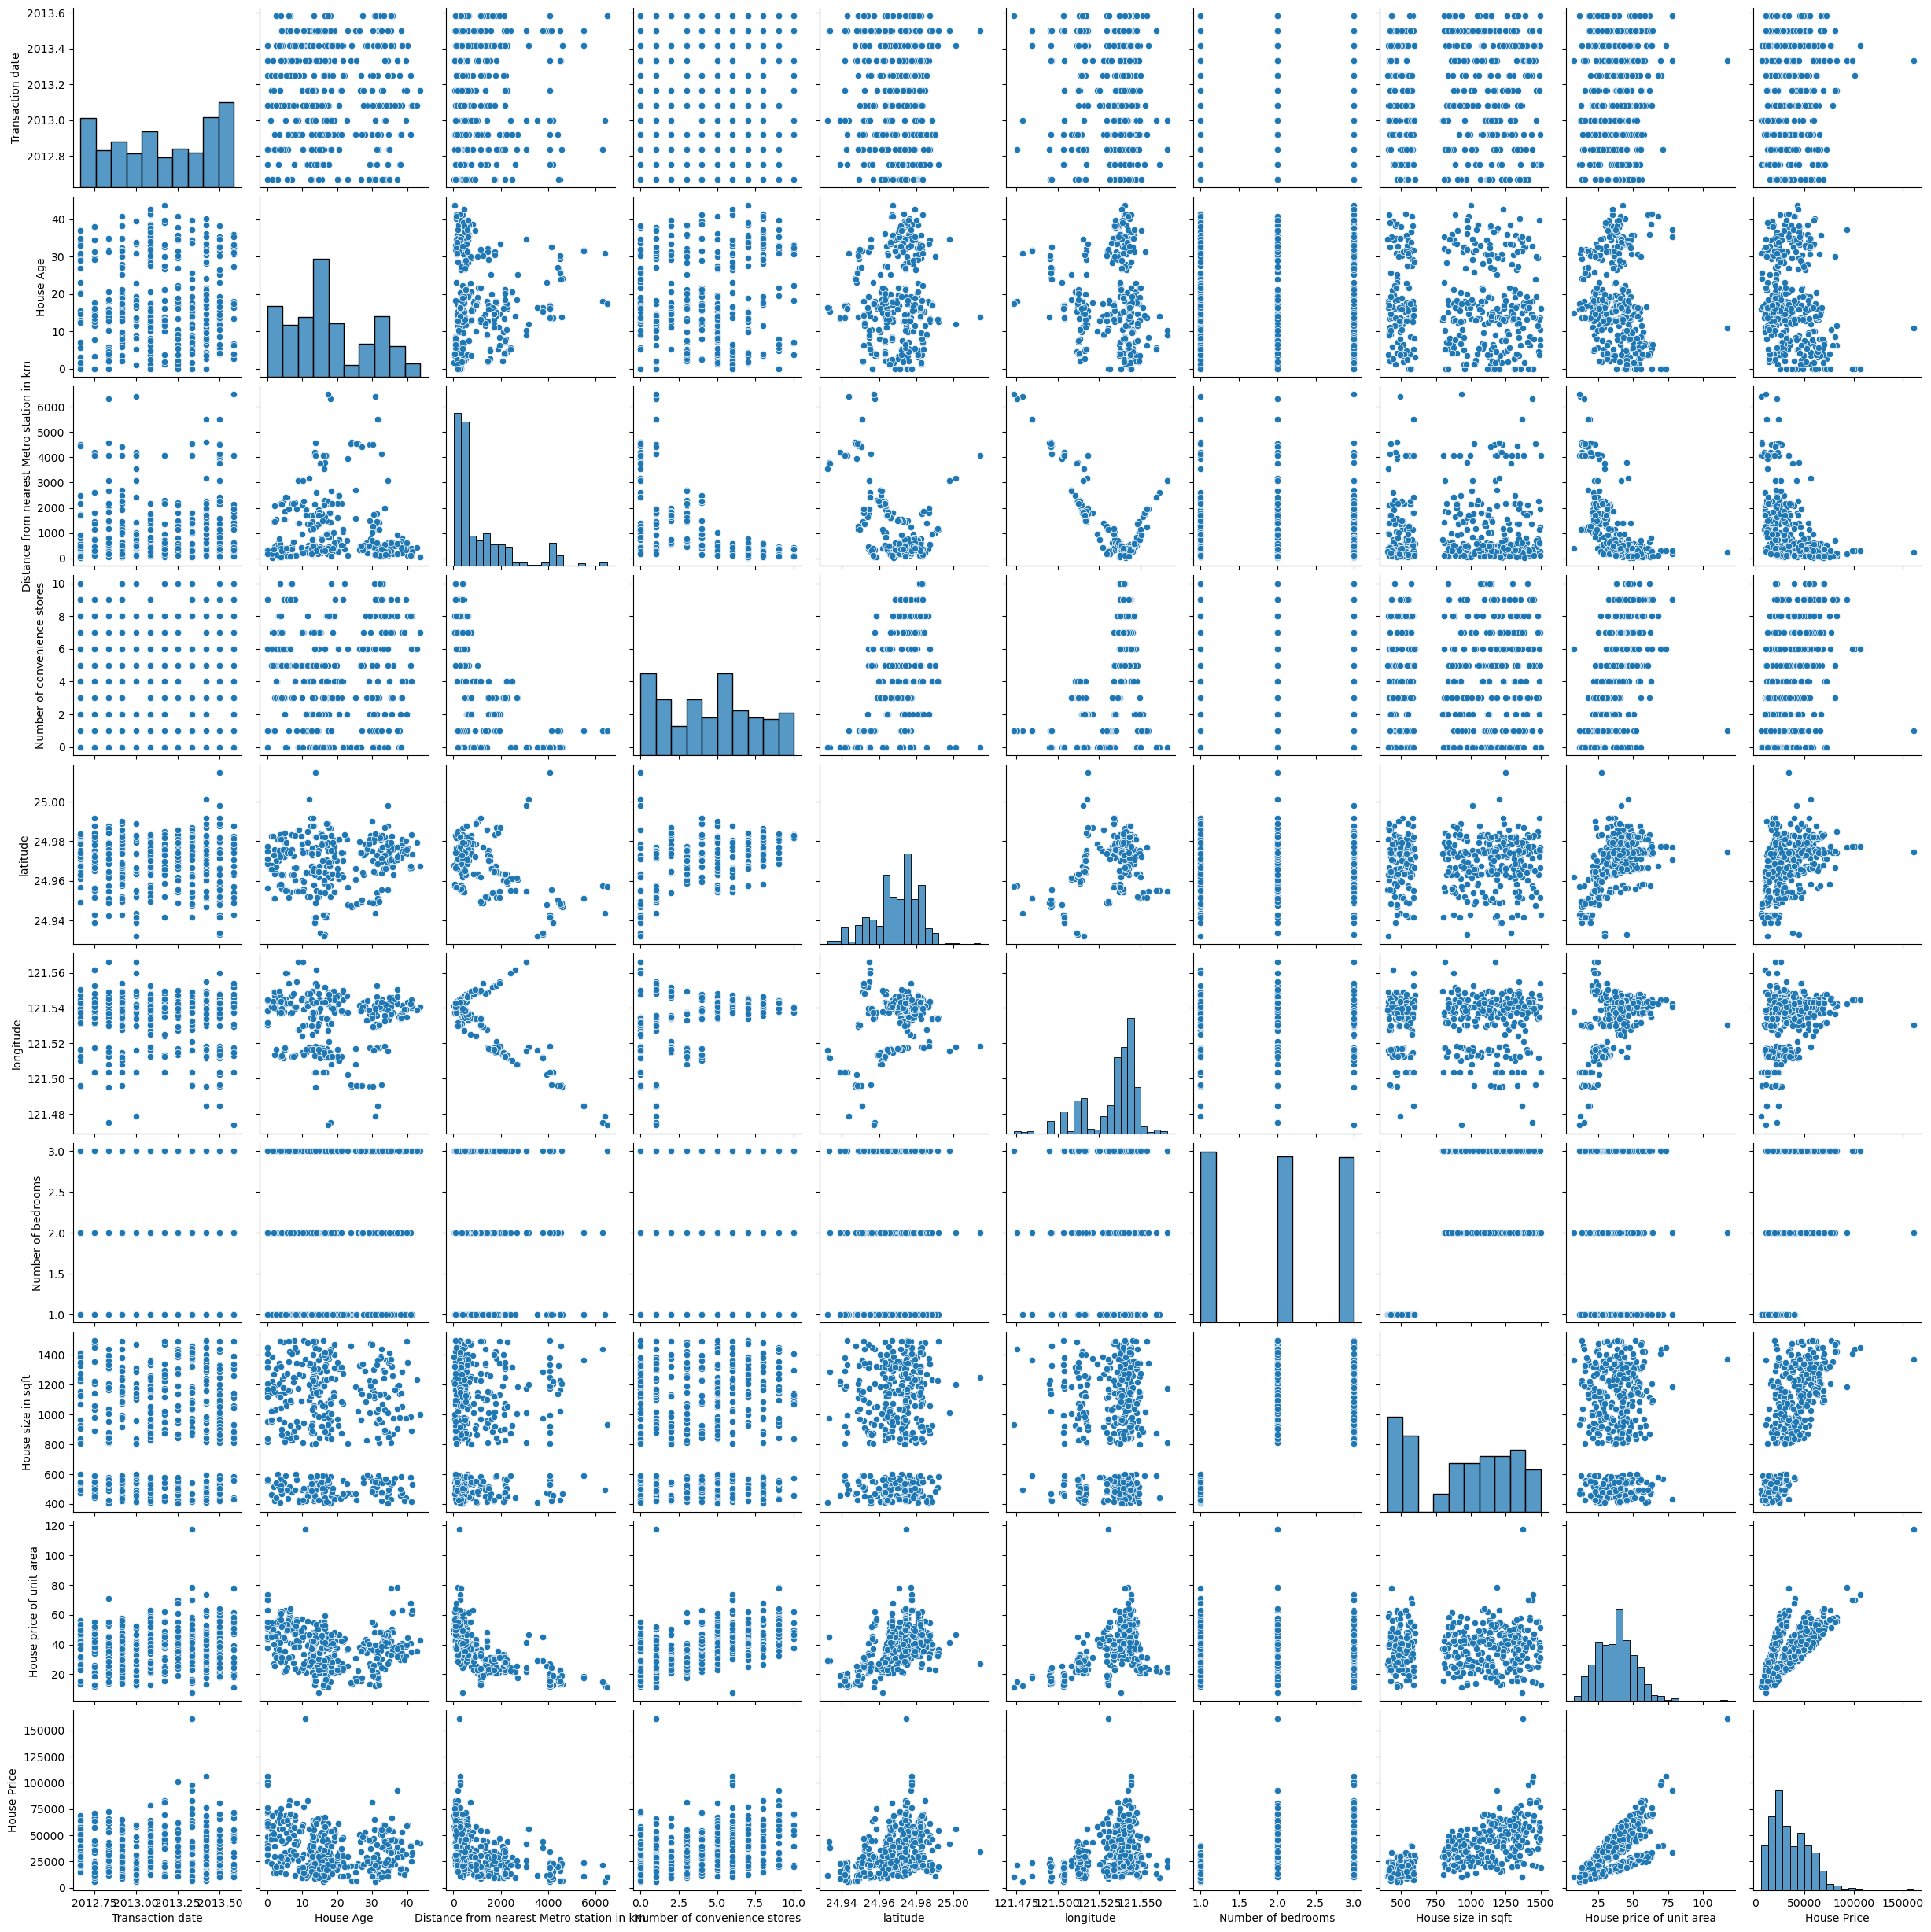

In [9]:
plt.figure(figsize=(8,8))
sns.pairplot(df)

# Missing Value Treatment

In [10]:
df.isnull().sum()

Transaction date                             0
House Age                                    0
Distance from nearest Metro station in km    0
Number of convenience stores                 0
latitude                                     0
longitude                                    0
Number of bedrooms                           0
House size in sqft                           0
House price of unit area                     0
House Price                                  0
dtype: int64

# Outliers Treatments

In [11]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station in km,Number of convenience stores,latitude,longitude,Number of bedrooms,House size in sqft,House price of unit area,House Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193,35597.804106
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488,19890.892075
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000,5440.400000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000,20482.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000,31224.200000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000,48439.375000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000,161327.500000


<AxesSubplot:>

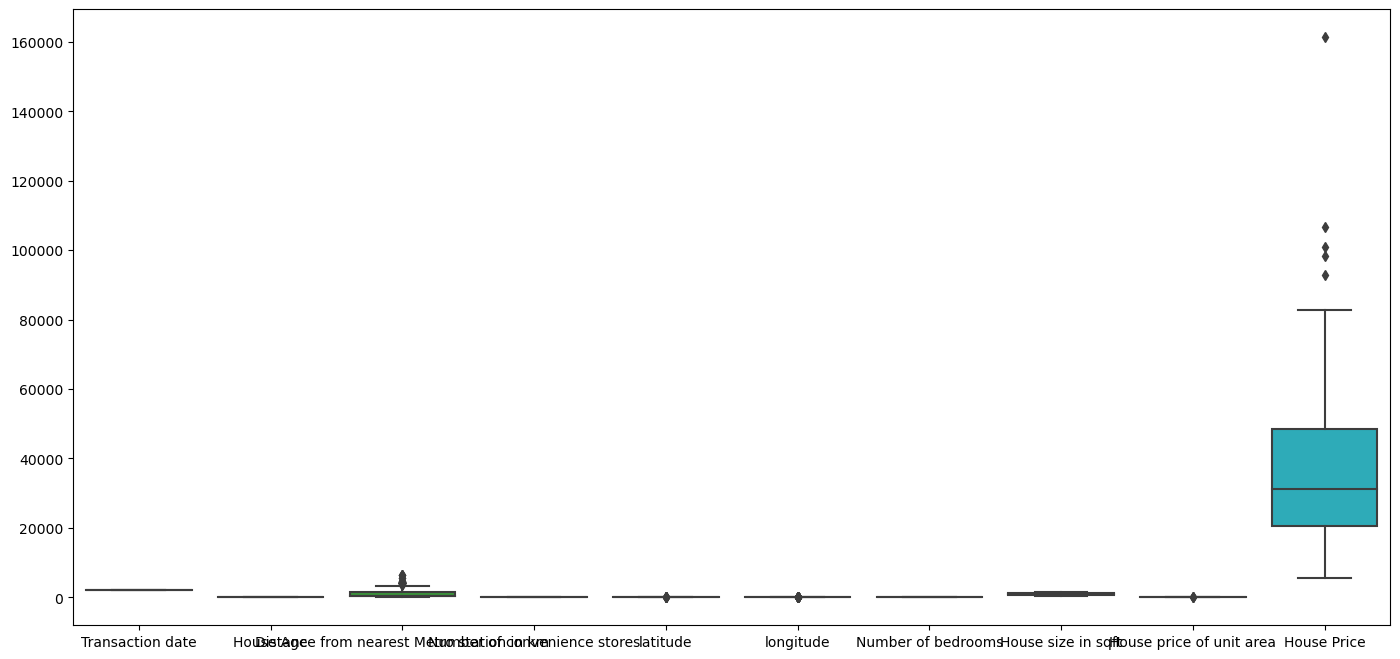

In [12]:
plt.figure(figsize=(17,8))
sns.boxplot(data=df)

In [13]:
from scipy import stats
z=np.abs(stats.zscore(df))
print(z)

     Transaction date  House Age  Distance from nearest Metro station in km  \
0            0.823683   1.255628                                   0.792495   
1            0.823683   0.157086                                   0.616612   
2            1.541151   0.387791                                   0.414015   
3            1.246435   0.387791                                   0.414015   
4            1.121951   1.117223                                   0.549997   
..                ...        ...                                        ...   
409          0.528967   0.352637                                   2.378365   
410          1.711384   1.064493                                   0.788071   
411          0.358734   0.095568                                   0.549678   
412          0.528967   0.844784                                   0.776684   
413          1.246435   0.985398                                   0.788071   

     Number of convenience stores  latitude  longit

In [14]:
threshold=3
print(np.where(z>3))

(array([  8,   8,  16,  35, 116, 116, 166, 249, 249, 255, 255, 270, 270,
       347, 347, 379], dtype=int64), array([2, 5, 9, 4, 2, 5, 9, 2, 5, 2, 5, 8, 9, 2, 5, 9], dtype=int64))


In [15]:
df1=df[(z< 3)]
print(df1)

     Transaction date  House Age  Distance from nearest Metro station in km  \
0            2012.917       32.0                                   84.87882   
1            2012.917       19.5                                  306.59470   
2            2013.583       13.3                                  561.98450   
3            2013.500       13.3                                  561.98450   
4            2012.833        5.0                                  390.56840   
..                ...        ...                                        ...   
409          2013.000       13.7                                 4082.01500   
410          2012.667        5.6                                   90.45606   
411          2013.250       18.8                                  390.96960   
412          2013.000        8.1                                  104.81010   
413          2013.500        6.5                                   90.45606   

     Number of convenience stores  latitude  longit

In [16]:
df.shape

(414, 10)

# Feature Selections

In [17]:
df.corr()

,Transaction date,House Age,Distance from nearest Metro station in km,Number of convenience stores,latitude,longitude,Number of bedrooms,House size in sqft,House price of unit area,House Price
Transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.061995,0.068437,0.087491,0.119066
House Age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567,-0.198741
Distance from nearest Metro station in km,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613,-0.441094
Number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005,0.381169
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307,0.378440
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287,0.346538
Number of bedrooms,0.061995,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265,0.548679
House size in sqft,0.068437,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489,0.702782
House price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000,0.698585
House Price,0.119066,-0.198741,-0.441094,0.381169,0.378440,0.346538,0.548679,0.702782,0.698585,1.000000


In [18]:
corr = df.corr()

<AxesSubplot:>

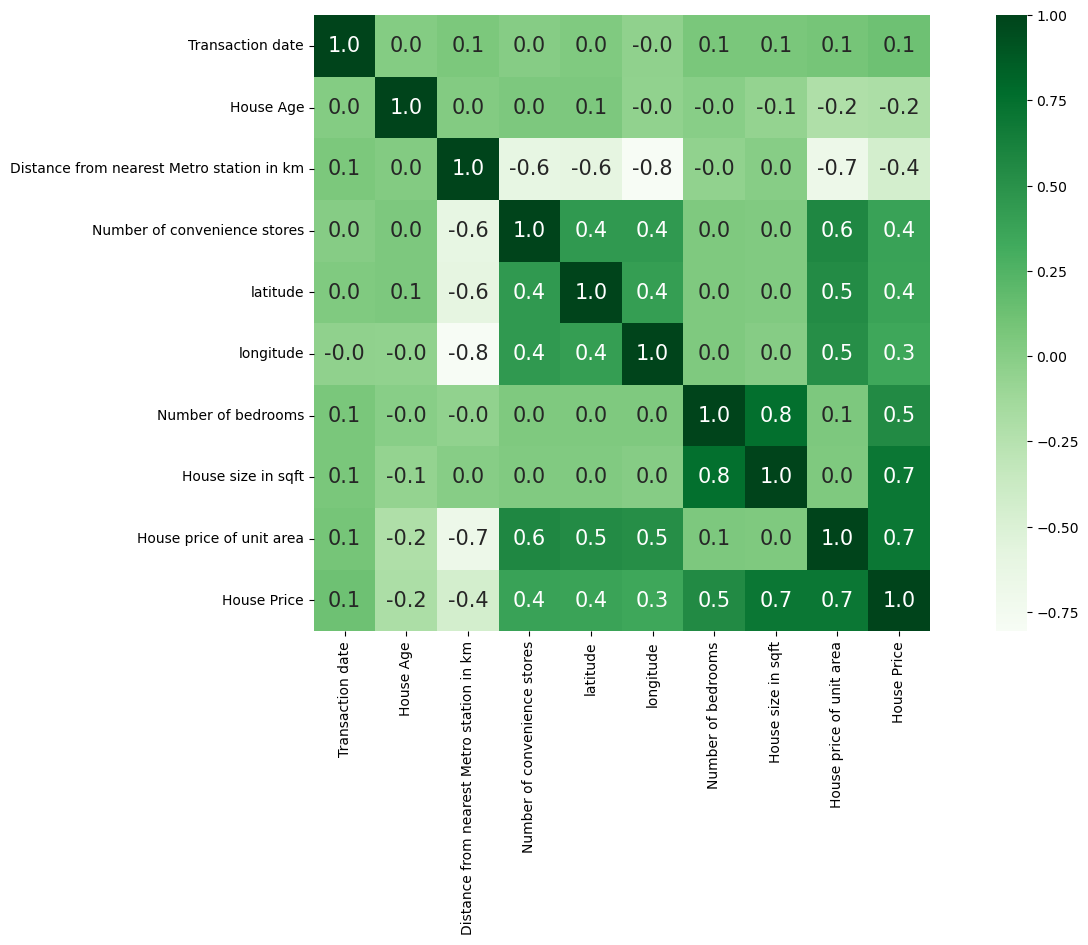

In [19]:
plt.figure(figsize=(17,8))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [20]:
df=df.reindex(columns= [ 'House Age','Distance from nearest Metro station in km','Number of convenience stores','latitude','longitude','Number of bedrooms','House size in sqft','House price of unit area','House Price'])

# Train Test Split

In [21]:
x=df.drop(columns=["House Price"],axis=1)
y=df["House Price"]

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Data Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model Building

In [25]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()
lmodel.fit(x_train,y_train)

LinearRegression()

In [26]:
lry_pred = lmodel.predict(x_test)
lry_pred

array([24522.24599128, 34250.87393952, 40383.29366769, -4852.56645559,
       63903.14975767, 42904.01658976, 29757.01777311, 21050.88273556,
       70878.49129447, 33722.30259858, 53787.68584403, 45169.89170956,
       11440.60703997, 52552.62788873, 61398.69728792, 46450.03044187,
       37676.25292876, 70187.84349015, 46627.94943366, 22950.56043785,
       33474.07642177,  7298.20878481,   985.16134101, 59144.76617708,
       23389.42061783, 15617.41002957,  9354.94634266, 31178.56815476,
       52323.07331095, 17970.92263443, 48018.6894785 , 33629.88698361,
       45659.75622259, 62730.98347143, 24571.07803456, 44801.78451958,
       55793.78453931, 35792.36687113, 57165.35398262, 34055.77134338,
       57318.3239767 ,  8289.73707889,  4977.67514393, 51341.20691256,
       33741.9187964 , 36879.11211655, 22459.51588882, 34474.41643932,
        1137.55367992, 42915.74458524, 67788.26760368, 43600.6356821 ,
       50222.39699989,  2804.72345859, 42783.84946664, 41406.30842914,
      

# Model Evalution

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
mean_squared_error(y_test,lry_pred)

27220304.321050983

In [29]:
np.sqrt(mean_squared_error(y_test,lry_pred))

5217.308148945295

In [30]:
r2_lmodel = round( metrics.r2_score(y_test, lry_pred) * 100 , 2 )
print( 'R2 Score of Linear Regression model : ', r2_lmodel )

R2 Score of Linear Regression model :  91.38


In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [32]:
kfold = KFold(n_splits=10,shuffle=True, random_state=0)
r2_score = cross_val_score(lmodel, x, y, cv=kfold)
print("r2_score:", r2_score)
print("Mean:", r2_score.mean())
print("Standard deviation:", r2_score.std())

r2_score: [0.94205665 0.90072323 0.8921043  0.93797456 0.93562138 0.94249757
 0.95816676 0.9225643  0.90369964 0.94794571]
Mean: 0.9283354094101313
Standard deviation: 0.021271258011592152


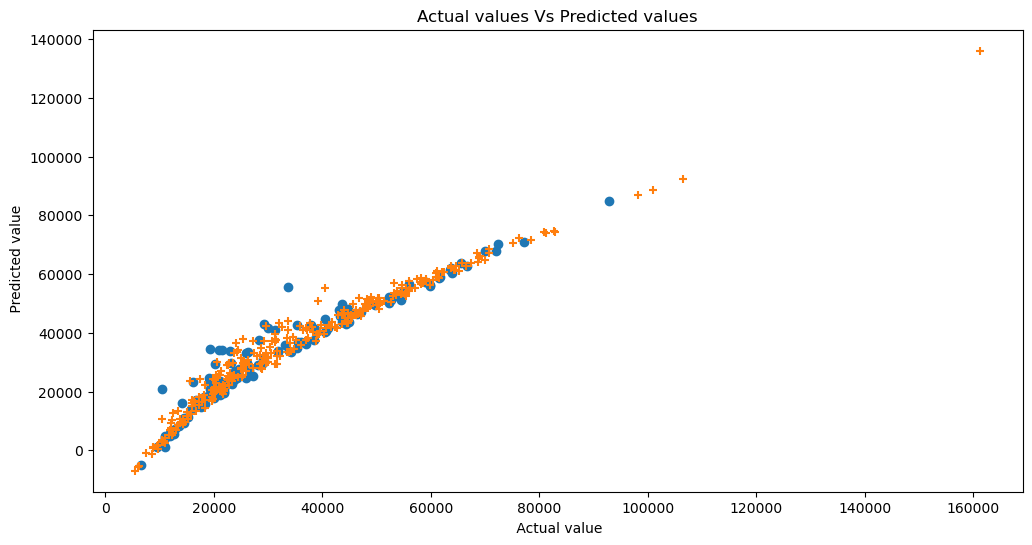

In [33]:
fig = plt.figure(figsize=(12,6))
plt.title(label="Actual values Vs Predicted values")
plt.scatter(y_test, lry_pred, marker="o")
plt.scatter(y_train,lmodel.predict(x_train),marker="+")
plt.xlabel(" Actual value")
plt.ylabel(" Predicted value")
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor
rmodel = RandomForestRegressor()
rmodel.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
rry_pred = rmodel.predict(x_test)
rry_pred

array([ 20102.957,  19182.888,  40471.878,   8470.939,  67261.816,
        45486.084,  24045.996,  20531.435,  70887.718,  34075.693,
        54580.87 ,  44836.869,  14724.419,  54687.512,  63885.802,
        47554.335,  36928.923,  71474.247,  47751.369,  21945.266,
        26972.873,  12221.047,  11403.727,  63170.864,  20240.065,
        18972.622,  15240.917,  30523.544,  52371.183,  18600.208,
        44103.09 ,  34000.98 ,  42586.916,  65142.956,  28152.322,
        41985.866,  60534.463,  33134.358,  61834.04 ,  19707.481,
        60344.922,  14373.929,  11653.856,  55226.926,  21725.053,
        37116.163,  22673.859,  18098.052,  10139.51 ,  27997.415,
        69488.611,  45223.455,  52689.452,  10756.195,  34353.545,
        36363.123,  27549.254,  45344.99 ,  43617.875,  28842.508,
        33926.623,  60839.239,  25539.767,  27324.97 ,  52158.172,
        11503.919,  18242.675,  21083.345,  68188.294,  21766.17 ,
        23818.348,  22013.203, 108811.618,  19578.982,  30320.

In [36]:
mean_squared_error(y_test,rry_pred)

4760101.067727977

In [37]:
np.sqrt(mean_squared_error(y_test,rry_pred))

2181.765584962779

In [38]:
r2_rmodel = round( metrics.r2_score(y_test, rry_pred) * 100 , 2 )
print( 'R2 Score of Random Forest Regressor model : ', r2_rmodel )

R2 Score of Random Forest Regressor model :  98.49


In [39]:
kfold = KFold(n_splits=10,shuffle=True, random_state=0)
r2_score = cross_val_score(rmodel, x, y, cv=kfold)
print("r2_score:", r2_score)
print("Mean:", r2_score.mean())
print("Standard deviation:", r2_score.std())

r2_score: [0.99295975 0.98029254 0.9870724  0.99480156 0.99284257 0.99267502
 0.99116083 0.82327848 0.9849321  0.9804276 ]
Mean: 0.9720442838867479
Standard deviation: 0.04984025186983148


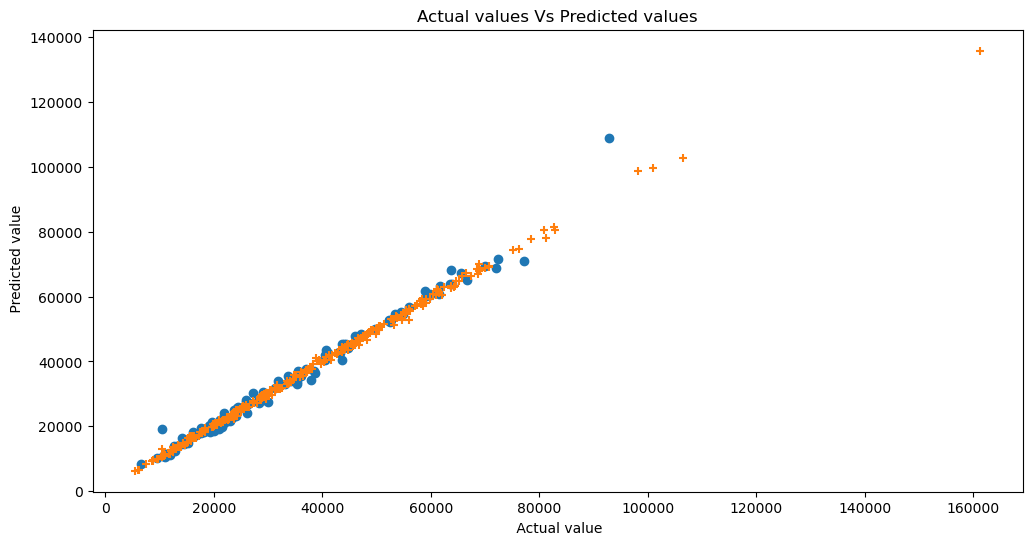

In [40]:
fig = plt.figure(figsize=(12,6))
plt.title(label="Actual values Vs Predicted values")
plt.scatter(y_test, rry_pred, marker="o")
plt.scatter(y_train,rmodel.predict(x_train),marker="+")
plt.xlabel(" Actual value")
plt.ylabel(" Predicted value")
plt.show()

In [41]:
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor()
ada_model.fit(x_train,y_train)

AdaBoostRegressor()

In [42]:
ada_y_pred = ada_model.predict(x_test)
ada_y_pred

array([28345.33043478, 31407.375     , 38981.16470588, 15536.40882353,
       60580.01518987, 48382.78243243, 30034.64594595, 27503.364     ,
       64551.02413793, 34049.80947368, 53501.725     , 41445.83020833,
       18132.58688525, 53476.52820513, 68131.48039216, 42908.865     ,
       36375.08169014, 69122.53958333, 48382.78243243, 28345.33043478,
       30056.7047619 , 16960.80625   , 16420.64146341, 62669.00780142,
       28345.33043478, 24023.57916667, 20376.11666667, 29446.41212121,
       52929.56825397, 18368.27818182, 44207.27586207, 34018.36491228,
       41283.17818182, 60371.20181818, 26948.02179487, 37143.375     ,
       56108.06607143, 33248.13793103, 63607.21428571, 31407.375     ,
       54590.3247191 , 18802.925     , 16568.2974359 , 53501.725     ,
       31407.375     , 36330.75918367, 27503.364     , 31407.375     ,
       15711.63529412, 32170.49375   , 67000.15257732, 45965.33609023,
       52929.56825397, 15711.63529412, 34184.58636364, 38167.4974026 ,
      

In [43]:
mean_squared_error(y_test,ada_y_pred)

25976582.99382755

In [44]:
np.sqrt(mean_squared_error(y_test,ada_y_pred))

5096.722769959884

In [45]:
r2_ada_model = round( metrics.r2_score(y_test, ada_y_pred) * 100 , 2 )
print( 'R2 Score of AdaBoost Regressor Regressor model : ', r2_ada_model )

R2 Score of AdaBoost Regressor Regressor model :  91.77


In [46]:
kfold = KFold(n_splits=10,shuffle=True, random_state=0)
r2_score = cross_val_score(ada_model, x, y, cv=kfold)
print("r2_score:", r2_score)
print("Mean:", r2_score.mean())
print("Standard deviation:", r2_score.std())

r2_score: [0.94449829 0.9224267  0.89336493 0.95110228 0.92659509 0.95612587
 0.949363   0.83321994 0.9459479  0.86372153]
Mean: 0.9186365523177409
Standard deviation: 0.039807462123778226


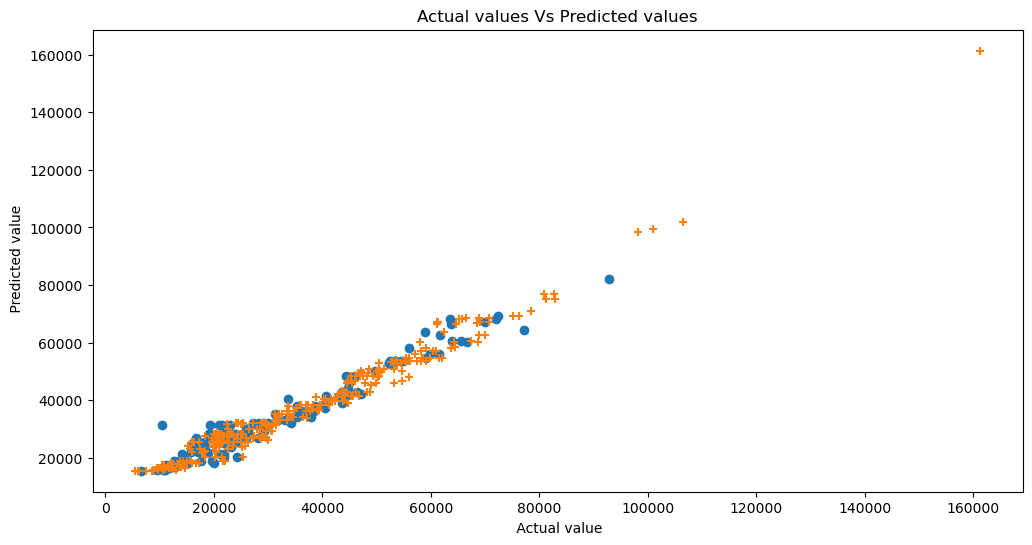

In [47]:
fig = plt.figure(figsize=(12,6))
plt.title(label="Actual values Vs Predicted values")
plt.scatter(y_test, ada_y_pred, marker="o")
plt.scatter(y_train,ada_model.predict(x_train),marker="+")
plt.xlabel(" Actual value")
plt.ylabel(" Predicted value")
plt.show()

In [48]:
models = pd.DataFrame({'Model':['Linear Regression', 'Random Forest Regressor','AdaBoost Regressor Regressor'],
                       'Score': [r2_lmodel, r2_rmodel,r2_ada_model]})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest Regressor,98.49
2,AdaBoost Regressor Regressor,91.77
0,Linear Regression,91.38
